In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('S02-hw-dataset.csv')

In [72]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [74]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [75]:
df.isna().mean()

,0
user_id,0.00000
age,0.04878
country,0.00000
purchases,0.00000
revenue,0.00000


In [76]:
df[df.duplicated() == True]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [77]:
df[(df['age'] < 18) | (df['age'] > 100) | (df['purchases'] < 0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


In [78]:
df[(df['purchases'] <= 0) & (df['revenue'] >= 0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0


In [79]:
df[df['revenue'] <= 0]

,user_id,age,country,purchases,revenue
6,7,46.0,RU,0,0
10,11,24.0,US,4,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0


In [80]:
df = df.drop(df[(df['purchases'] <= 0) & (df['revenue'] >= 0)].index)

Основные проблемы датасета заключаются в том, что есть отсутствующие значения, это может в дальнейшем сыграть "злую шутку". Данные сами по себе противоречивые. Есть человек с -1 покупкой, которому уже 120 лет, а есть пятилетний ребенок, который совершил 8 покупок.

Есть пользователи, которые совершили 0 покупок, но это еще имеет право на существование, но есть тот, кто совершил 4 покупки и не зарабатывает...

In [81]:
df.drop_duplicates() # удалим дубликаты
# замением пропуски возраста на медиану по возрасту
df.loc[df['age'].isna(), 'age'] = df['age'].dropna().median()
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,33.0,DE,6,1296


In [82]:
# сгруппируем по доходам для каждой стране
country_revenue = df.groupby('country')['revenue'].mean()
country_revenue

,revenue
country,
CN,1054.000000
DE,1445.500000
FR,732.600000
RU,933.727273
US,557.375000


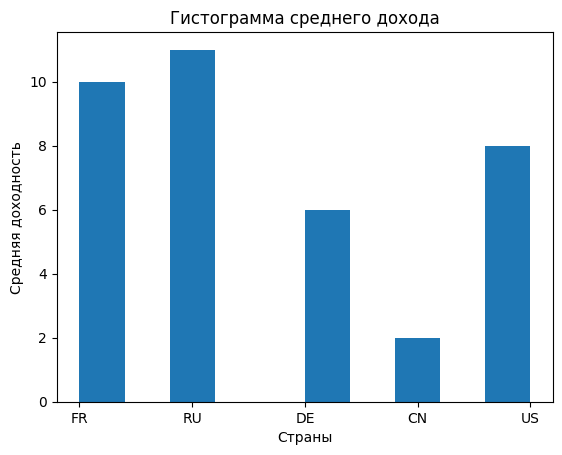

In [83]:
plt.hist(df['country'])
plt.xlabel("Страны")
plt.ylabel("Средняя доходность")
plt.title("Гистограмма среднего дохода")
plt.savefig("histogram.png")
plt.show()

С помощью представленной гистограммы можно предположить чисто статистически, что в России и Франции средний доход выходит заметно выше, по-сравнению с остальными представленными странами.

In [84]:
country_benefit = df.groupby('country')['revenue'].apply(np.array)
country_benefit

,revenue
country,
CN,"[456, 1652]"
DE,"[1296, 2358, 2475, 702, 1104, 738]"
FR,"[749, 399, 693, 183, 1608, 546, 1440, 142, 404..."
RU,"[1115, 654, 511, 432, 442, 1488, 650, 1302, 10..."
US,"[980, 0, 630, 904, 330, 828, 445, 342]"


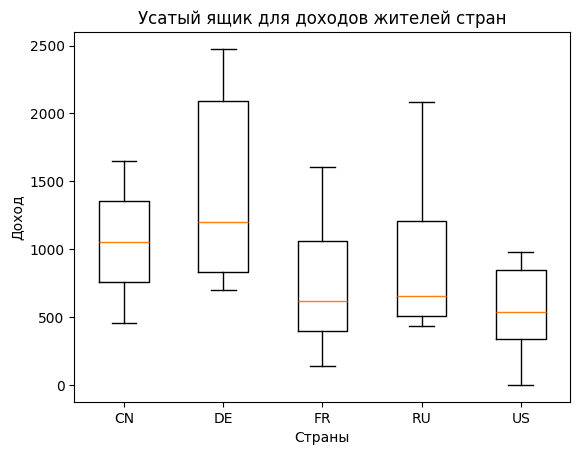

In [85]:
plt.boxplot(country_benefit.to_list())
plt.xticks(range(1, len(country_benefit) + 1), country_benefit.index)
plt.xlabel("Страны")
plt.ylabel("Доход")
plt.title("Усатый ящик для доходов жителей стран")
plt.savefig('boxplot.png')

In [86]:
age_revenue = df.groupby('age')['revenue'].mean()
age_revenue

,revenue
age,
5.0,1488.00
18.0,1104.00
20.0,1652.00
21.0,650.00
22.0,183.00
23.0,445.00
24.0,534.25
25.0,749.00
26.0,1080.00


In [87]:
y = np.array(age_revenue.to_list())
X = np.array(age_revenue.index)

In [88]:
y

array([1488.  , 1104.  , 1652.  ,  650.  ,  183.  ,  445.  ,  534.25,
        749.  , 1080.  ,  456.  ,  548.  , 2041.5 ,  824.  , 2086.  ,
        534.  , 2358.  , 1071.  ,  904.  ,  828.  ,  404.  ,  936.  ,
        342.  ,  550.5 , 1302.  ,  142.  ,  693.  ])

In [89]:
X

array([ 5., 18., 20., 21., 22., 23., 24., 25., 26., 28., 31., 32., 33.,
       34., 35., 36., 39., 42., 43., 45., 47., 51., 52., 54., 55., 57.])

/tmp/ipython-input-4290382109.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


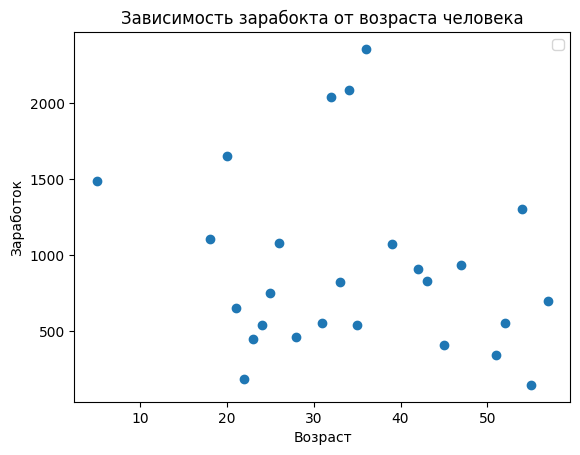

In [90]:
plt.scatter(X, y)
plt.xlabel('Возраст')
plt.ylabel("Заработок")
plt.title("Зависимость зарабокта от возраста человека")
plt.legend()
plt.savefig('scatter.jpg')
plt.show()